In [1]:
import numpy 
from matplotlib import pyplot, animation, rcParams
%matplotlib inline
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from IPython.display import HTML

In [2]:
# parameters
nx = 81      # number of x-intervals
nt = 80      # number of time intervals
sigma = 0.8
c  = 1.
dx = 4.0/(nx-1)
dt = sigma * dx/c

In [3]:
# initialization
x =  numpy.arange(0,4+dx,dx)
u = numpy.zeros(nx)
un = numpy.zeros(nx)

u[0] = 1          # sets the rhs value to 1
un[0] = 1

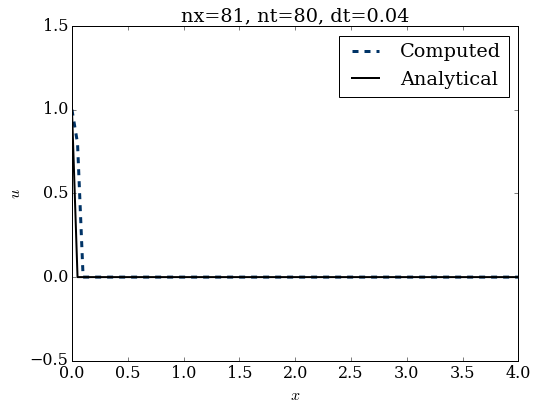

In [4]:
# create initial plot lines        
fig = pyplot.figure(figsize=(8,6))
ax = pyplot.axes(xlim=(0, 4), ylim=(-0.5, 1.5))
line1 = ax.plot([], [], color='#003366', ls='--', lw=3)[0]
line2 = ax.plot([], [],'k-', lw=2)[0]
ax.legend(['Computed', 'Analytical'])

pyplot.xlabel('$x$')
pyplot.ylabel('$u$')
pyplot.title('nx='+str(nx)+', nt='+str(nt)+', dt='+str(round(dt, 2)), family='serif')

def init():
    for i in range(1,nx):
        # backward difference for first step in time
        u[i] = un[i]- sigma*( un[i]- un[i-1] )
    line1.set_data(x, u)
    line2.set_data(x, numpy.where(x < c*1*dt, numpy.ones(nx),numpy.zeros(nx) ) )
    
def leapfrog(n):
    unminus1_local = un.copy()
    un_local = u.copy()
    
    for i in range(1,nx-1):
        # leapfrog
        un[i] = u[i]
        u[i] = unminus1_local[i]- sigma*( un_local[i+1]- un_local[i-1] )
    u[0] = 1
    
    line1.set_data(x, u)
    # another +1 is because we have used backward difference in the first time step
    line2.set_data(x, numpy.where(x < c*(n+1+1)*dt, numpy.ones(nx),numpy.zeros(nx) ) )
    
anim = animation.FuncAnimation(fig, leapfrog, frames=nt, init_func=init, interval=50)

In [5]:
HTML(anim.to_html5_video())